#  Good Game: Análisis de ventas de video juegos
**Descripción del proyecto**
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

**Descripción de datos**
- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género) 
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses) 
- EU_sales (ventas en Europa en millones de dólares estadounidenses) 
- JP_sales (ventas en Japón en millones de dólares estadounidenses) 
- Other_sales (ventas en otros países en millones de dólares estadounidenses) 
- Critic_Score (máximo de 100) 
- User_Score (máximo de 10) 
- Rating (ESRB)


Es posible que los datos de 2016 estén incompletos.
¿Cómo será evaluado mi proyecto?
Lee atentamente estos criterios de evaluación de proyectos antes de empezar a trabajar.
Esto es lo que buscan los revisores de proyecto cuando evalúan tu proyecto:
•	¿Cómo describirías los problemas identificados en los datos?
•	¿Cómo se prepara un dataset para el análisis?
•	¿Cómo creas gráficos de distribución y cómo los explicas?
•	¿Cómo calculas la desviación estándar y varianza?
•	¿Formulas las hipótesis alternativas y nulas?
•	¿Qué métodos aplicas a la hora de probarlos?
•	¿Explicas los resultados de tus pruebas de hipótesis?
•	¿Sigues la estructura del proyecto y mantienes tu código ordenado y comprensible?
•	¿A qué conclusiones llegas?
•	¿Has dejado comentarios claros y relevantes en cada paso?
Todo lo que necesitas para completar este proyecto se encuentra en las hojas informativas y los resúmenes de los capítulos anteriores.
¡Buena suerte!

## Tabla de Contenidos    

1. [Paso 1. Abre el archivo de datos y estudia la información general](#1) 
1. [Paso 2. Prepara los datos](#2) 
1. [Paso 3. Analiza los datos](#3)     
1. [Paso 4. Crea un perfil de usuario para cada región](#4)     
1. [Paso 5. Prueba las siguientes hipótesis](#5)       
1. [Paso 6. Escribe una conclusión general](#6)

# Paso 1. Abre el archivo de datos y estudia la información general 
Ruta de archivo:
/datasets/games.csv . Descarga el dataset

In [1]:
#importar librerías 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns


In [2]:
df_games = pd.read_csv("/datasets/games.csv")

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1629,Donkey Kong Country 2,GBA,2004.0,Platform,0.79,0.27,0.12,0.04,80.0,9.1,E
7291,The Legend of Heroes: Trails in the Sky First ...,PSP,2006.0,Role-Playing,0.10,0.03,0.06,0.03,NaN,NaN,NaN
8381,VR Golf '97,PS,1996.0,Sports,0.09,0.06,0.00,0.01,NaN,NaN,NaN
3050,Madagascar,GC,2005.0,Platform,0.52,0.13,0.00,0.02,70.0,tbd,E10+
8662,Culdcept,3DS,2012.0,Misc,0.00,0.00,0.16,0.00,NaN,NaN,NaN
5774,Mountain King,2600,1982.0,Action,0.29,0.02,0.00,0.00,NaN,NaN,NaN
13821,Sega Ages 2500 Series Vol. 33: Fantasy Zone Co...,PS2,2008.0,Shooter,0.00,0.00,0.04,0.00,NaN,NaN,NaN
8656,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008.0,Strategy,0.00,0.00,0.16,0.00,NaN,NaN,NaN
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
8052,Ghostbusters: The Video Game,PSP,2009.0,Action,0.16,0.01,0.00,0.02,54.0,4.7,E10+


# Paso 2. Prepara los datos
- Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [5]:
new_col_names = []
for column in df_games.columns:
    col_lower = column.lower()
    new_col_names.append(col_lower)

df_games.columns = new_col_names

In [6]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Convierte los datos en los tipos necesarios.**
- Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df_games["name"] = df_games["name"].str.upper()
df_games["name"] = df_games["name"].str.strip()
df_games["name"] = df_games["name"].str.replace(".","").str.replace(",","").str.replace(";","").str.replace(":","")

In [9]:
console_lifespan = {
    "2600": (1977,1992),
    "3DO": (1993,1997),
    "3DS": (2011,2018),
    "DC": (1998,2001),
    "DS":(2004,2016),
    "GB": (1989,2003),
    "GBA": (2001,2010),
    "GC": (2001,2007),
    "GEN": (1990,1997),
    "GG": (1990,1997),
    "N64": (1996,2002),
    "NES": (1983,2003),
    "NG": (1990, 1997), 
    "PC": (1999,2016),
    "PCFX": (1994,1998),
    "PS": (1994,2006), 
    "PS2": (2000,2013),
    "PS3": (2006, 2017),
    "PS4": (2014,2016),
    "PSP": (2004,2014),
    "PSV": (2011,2016),
    "SAT": (1994,2000),
    "SCD": (1991,1996),
    "SNES": (1990,2003),
    "TG16": (1987,1993),
    "WS": (1999,2003),
    "Wii": (2006, 2014),
    "WiiU": (2012,2016),
    "X360": (2005,2016),
    "XB": (2002,2005),
    "XOne": (2013,2017)}

def fill_missing_year(row, console_lifespan):
    if pd.isna(row["year_of_release"]):
        if row["platform"] in console_lifespan:
            start_year, end_year = console_lifespan[row["platform"]]
            avg_year = int(np.mean([start_year, end_year]))
            return avg_year
    return row["year_of_release"]

df_games["year_of_release"] = df_games.apply(lambda row: fill_missing_year(row, console_lifespan), axis=1)


In [10]:
df_games["year_of_release"] = df_games["year_of_release"].astype(int)

In [11]:
df_games["user_score"] = df_games["user_score"].replace("tbd", np.nan)
df_games["user_score"] = df_games["user_score"].astype(float)
df_games["user_score"] = df_games["user_score"]*10

Se cambió la columna *"user_score"* a tipo float para que coincida con la de *critic_score* y al ser una calificación se requiere que mantenga su precisión numérica.  Así como también para *year_of release* se cambia a tipo integer para que sea del formato correcto correspondiente a una fecha. 

In [12]:
describe_stat_scores = df_games[["critic_score","user_score"]].describe()
describe_stat_scores

,critic_score,user_score
count,8137.000000,7590.000000
mean,68.967679,71.250461
std,13.938165,15.000061
min,13.000000,0.000000
25%,60.000000,64.000000
50%,71.000000,75.000000
75%,79.000000,82.000000
max,98.000000,97.000000


In [13]:
statistics_by_platform = df_games.groupby("platform")[["critic_score","user_score"]].mean()
statistics_by_platform

,critic_score,user_score
platform,,
2600,NaN,NaN
3DO,NaN,NaN
3DS,67.101190,68.316092
DC,87.357143,85.285714
DS,63.761506,70.251938
GB,NaN,NaN
GBA,67.372146,76.768627
GC,69.488839,75.975410
GEN,NaN,NaN


In [14]:
df_games["critic_score"] = df_games["critic_score"].fillna(0)
df_games["user_score"] = df_games["user_score"].fillna(0)

Se llenan los valores ausentes con cero debido a que pertenecen a las consolas más antiguas. Igualmente para mantener mayor veracidad de los datos y no tratar con escenarios ficticios. Más adelante solo se analizan las consolas más recientes ya que son las que toman parte del análisis. 

In [15]:
df_games["rating"] = df_games["rating"].fillna("Not Rated")

In [16]:
df_games[["genre","name"]].isna().sum()

genre    2
name     2
dtype: int64

In [17]:
df_games.duplicated().sum()

0

In [18]:
df_games[df_games[["name","platform","year_of_release"]].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,0.0,0.0,Not Rated
16230,MADDEN NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,55.0,E


In [19]:
df_games.query("name == 'MADDEN NFL 13' and platform == 'PS3'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,MADDEN NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,55.0,E
16230,MADDEN NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,55.0,E


In [20]:
df_games = df_games.drop_duplicates(subset = ["name","platform","year_of_release"]).reset_index(drop = True)

- Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [21]:
df_games["total_sales"] = df_games["na_sales"] + df_games["eu_sales"] + df_games["jp_sales"] + df_games["other_sales"]
df_games.insert(8,"total_sales", df_games.pop("total_sales"))

# Paso 3. Analiza los datos
- Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [22]:
def launch (year):
    if year < 1990:
        return "1980's"
    elif year < 2000:
        return "1990's"
    elif year < 2010:
        return "2000's"
    elif year >= 2010:
        return "2010's"
    elif year == 0:
        return "undefined"
    else: 
        return "unknown"

In [23]:
df_games["launch"] = df_games["year_of_release"].apply(launch)
decade_games = df_games["launch"].value_counts().reset_index()
decade_games

,index,launch
0,2000's,9313
1,2010's,5404
2,1990's,1774
3,1980's,222


<AxesSubplot:title={'center':'Total Released Games per Decade'}>

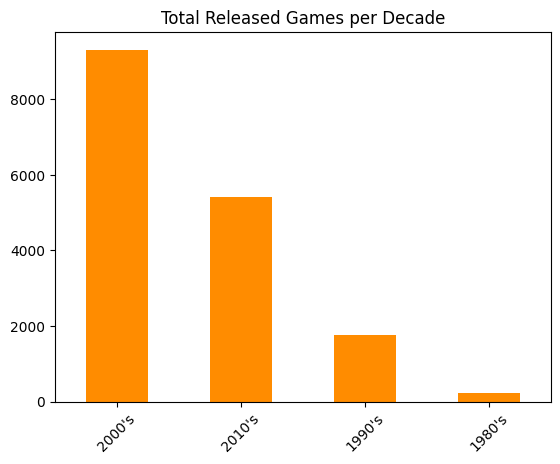

In [24]:
decade_games.plot(kind="bar", x="index", rot=45, legend="", xlabel="", title="Total Released Games per Decade", color="darkorange")

Esta breve visualización que divide la cantidad de juegos lanzados durante las decadas de 1980 a los 2010 nos demuestra que esta industria del entretenimiento ha crecido exponencialmente, siendo que en los *90´s* se tiene registrados un total de casi 1800 títulos lanzados en dicha época. Y para los *2000's* tuvo un gran crecimiento con más de 9000 videojuegos. Para los años del *2010's* puede que no se vea el crecimiento porque contamos con los datos de lanzamientos hasta el 2016. 

- **Observa cómo varían las ventas de una plataforma a otra.** Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [25]:
console_sales = df_games.groupby("platform")["total_sales"].sum()
console_sales.sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [26]:
list_popular_consoles = ["PS2", "X360", "PS3", "Wii", "DS"]
most_sold_consoles = df_games["platform"].isin(list_popular_consoles)

In [27]:
only_most_sold = df_games[most_sold_consoles]
only_most_sold

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,launch
0,WII SPORTS,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,80.0,E,2000's
2,MARIO KART WII,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,83.0,E,2000's
3,WII SPORTS RESORT,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,80.0,E,2000's
6,NEW SUPER MARIO BROS,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,85.0,E,2000's
7,WII PLAY,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,66.0,E,2000's
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16698,MEZASE!! TSURI MASTER DS,DS,2009,Sports,0.00,0.00,0.01,0.00,0.01,0.0,0.0,Not Rated,2000's
16702,PLUSHEES,DS,2008,Simulation,0.01,0.00,0.00,0.00,0.01,0.0,0.0,E,2000's
16707,SCORE INTERNATIONAL BAJA 1000 THE OFFICIAL GAME,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Not Rated,2000's
16708,SAMURAI WARRIORS SANADA MARU,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,Not Rated,2010's


In [48]:
ds_mistaken_year = only_most_sold[only_most_sold["year_of_release"] == 1985]
ds_mistaken_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,launch
15956,STRONGEST TOKYO UNIVERSITY SHOGI DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.02,0.0,0.0,Not Rated,1980's


La tabla originalmente tiene el videojuego *STRONGEST TOKYO UNIVERSITY SHOGI DS* registrado con un año de lanzamiento de 1985. Este dato es erróneo por lo que será necesario modiifcarlo por el año correcto que es 2010. 

In [49]:
only_most_sold = only_most_sold.replace(1985,2010)

In [50]:
sales_by_year_platform = only_most_sold.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()
sales_by_year_platform

,year_of_release,platform,total_sales
0,2000,PS2,39.17
1,2001,PS2,166.43
2,2002,PS2,205.38
3,2003,PS2,184.31
4,2004,DS,17.27
5,2004,PS2,211.81
6,2005,DS,130.14
7,2005,PS2,160.66
8,2005,X360,8.25
9,2006,DS,119.81


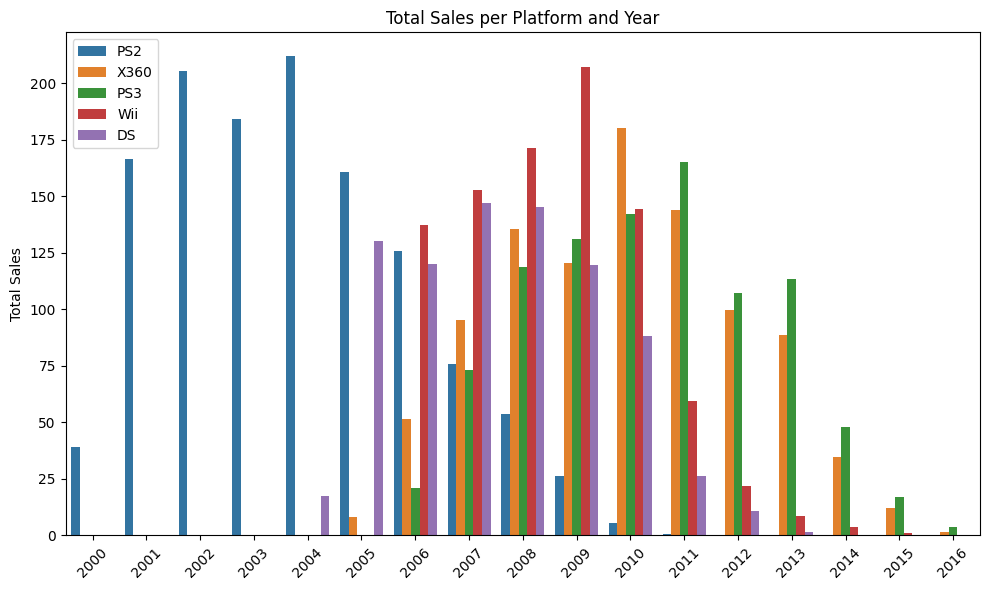

In [52]:

df_sales_ps2 = sales_by_year_platform[sales_by_year_platform["platform"] == "PS2"]
df_sales_x360 = sales_by_year_platform[sales_by_year_platform["platform"] == "X360"]
df_sales_ps3 = sales_by_year_platform[sales_by_year_platform["platform"] == "PS3"]
df_sales_wii = sales_by_year_platform[sales_by_year_platform["platform"] == "Wii"]
df_sales_ds = sales_by_year_platform[sales_by_year_platform["platform"] == "DS"]

df_sales_ps2_grouped = df_sales_ps2.groupby("year_of_release")["total_sales"].sum().reset_index()
df_sales_x360_grouped = df_sales_x360.groupby("year_of_release")["total_sales"].sum().reset_index()
df_sales_ps3_grouped = df_sales_ps3.groupby("year_of_release")["total_sales"].sum().reset_index()
df_sales_wii_grouped = df_sales_wii.groupby("year_of_release")["total_sales"].sum().reset_index()
df_sales_ds_grouped = df_sales_ds.groupby("year_of_release")["total_sales"].sum().reset_index()


df_sales_ps2_grouped["platform"] = "PS2"
df_sales_x360_grouped["platform"] = "X360"
df_sales_ps3_grouped["platform"] = "PS3"
df_sales_wii_grouped["platform"] = "Wii"
df_sales_ds_grouped["platform"] = "DS"


df_sales_combined = pd.concat([df_sales_ps2_grouped, df_sales_x360_grouped, df_sales_ps3_grouped, df_sales_wii_grouped, df_sales_ds_grouped])


plt.figure(figsize=(10, 6))
sns.barplot(x="year_of_release", y="total_sales", hue="platform", data=df_sales_combined)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.title("Total Sales per Platform and Year")
plt.xlabel("")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las consolas con mayores ventas según los datos son: 
- PS2     
- X360     
- PS3     
- Wii      
- DS

Las consolas tienen un tiempo de vida de aproximadamente 13 años. En el quinto año a partir de su lanzamiento las consolas llegan a un gran número de ventas, ya sea debido a que se han establecido como plataformas con buenos lanzamientos en sus video juegos o porque han ganado popularidad entre el público. 

Por ejemplo, el punto más alto de ventas para la Wii fue de 206.97 millones de ventas totales en 2009 y para la consola más vendida de todos los tiempos, la PS4, alcanzó hasta casi 212 millones de ventas en 2004. 

Sin embaargo, siempre llagan consolas que introducen mejoras en el rendimiento gráfico y/o jugable para la calidad de los juegos, por lo que una plataforma vieja empieza a perder territorio en ventas considerable a partir del octavo año en el que está disponible al público. A partir del décimo año sería el promedio en donde cada consola vende menos, entre un 0.5 a 1.5 millones de video juegos. 

- Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.???
- Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
- ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
- Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

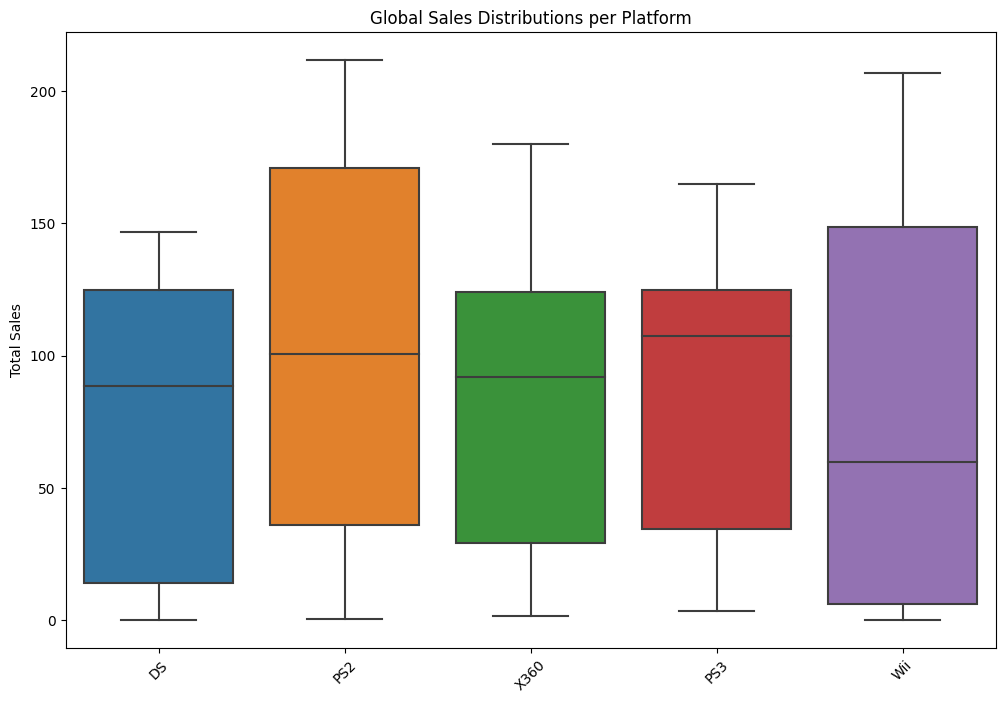

In [30]:

plt.figure(figsize=(12, 8))
sns.boxplot(x="platform", y="total_sales", data=sales_by_year_platform)
plt.title("Global Sales Distributions per Platform")
plt.xlabel("")
plt.ylabel("Total Sales")


plt.xticks(rotation=45)

plt.show()

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? **Describe tus hallazgos.**

Las consolas con mayores ventas son la DS, PS2, X360, PS3 y Wii. Para estas primeras cuatro consolas tienen casi un promerio entre los 90 a 110 millones de ventas en promedio. Mientras que la Wii es un caso peculiar debido a que su promedio de ventas es menor comparado con el resto de las otras consolas, con un promedio de de 60 millones de ventas. Sin embargo, es una consola que cuenta con valores atípicos de de hasta 200 millones de ventas, junto con la PS2. La consola más vendida de la historia, la PS2, presenta las razones de su éxito a través de este gráfico. ya que los datos se distribuen principalmente entre los 50 a 170 millones de ventas. Este sería un caso que marca una diferencia entre las demás consolas. 

De igual manera, se puede observar que los años más competitivos entre consolas fue entre la X360 y la PS3. Ambas consolas fueron vendidas al público al mismo tiempo. Se observa que sus los valores de ambas se distribuyen casi igual, entre 40 a 135 millones de ventas. Sin embargo, la PS3 tiene un promedio mayor de ventas con 110 millones y la x360 con 90 millones. Es una generación interesante, ya que PS acababa de construir su mayor éxito con la PS2; pero Xbox logró posicionar una competencia con su consola y juegos. 

**Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular** (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

<AxesSubplot:title={'center':'Correlation Between Sales and Critic Score for PS4'}, xlabel='Critic Score', ylabel='Total Sales'>

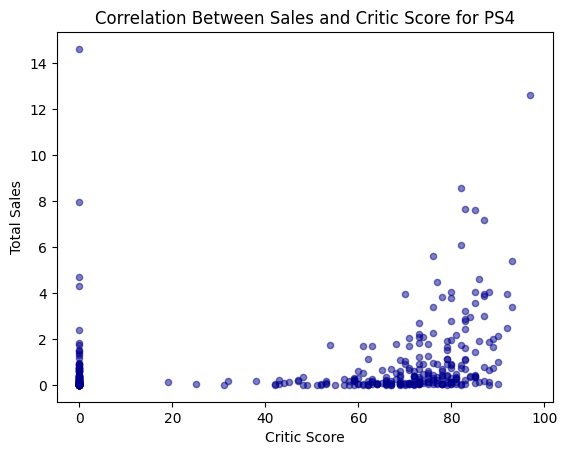

In [31]:
critic_corr_PS4 = df_games[df_games["platform"] == "PS4"][["total_sales","critic_score"]]
critic_corr_PS4.plot(kind="scatter", x="critic_score", y="total_sales", alpha=0.5, xlabel="Critic Score", ylabel="Total Sales", 
                      color="darkblue", title="Correlation Between Sales and Critic Score for PS4")

<AxesSubplot:title={'center':'Correlation Between Sales and User Score for PS4'}, xlabel='User Score', ylabel='Total Sales'>

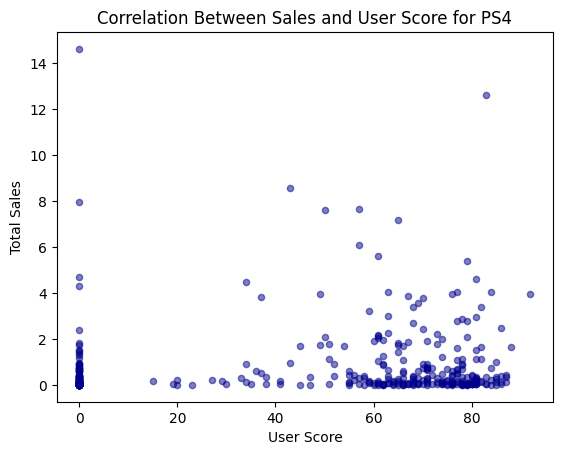

In [32]:
critic_corr_PS4 = df_games[df_games["platform"] == "PS4"][["total_sales","user_score", "critic_score"]]
critic_corr_PS4.plot(kind="scatter", x="user_score", y="total_sales", alpha=0.5, 
                     xlabel="User Score", ylabel="Total Sales", 
                      color="darkblue", title="Correlation Between Sales and User Score for PS4")

In [33]:
critic_corr_PS4.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.113116,0.22755
user_score,0.113116,1.000000,0.90085
critic_score,0.227550,0.900850,1.00000


In [34]:
shared_releases_xbox = df_games[df_games["platform"] == "XOne"]
shared_releases_ps4 = df_games[df_games["platform"] == "PS4"]
shared_releases = shared_releases_xbox.merge(shared_releases_ps4, on="name", how="inner")
#shared_releases

<AxesSubplot:title={'center':'Correlation Between Sales and Critic Score for XOne'}, xlabel='Critic Score', ylabel='Total Sales'>

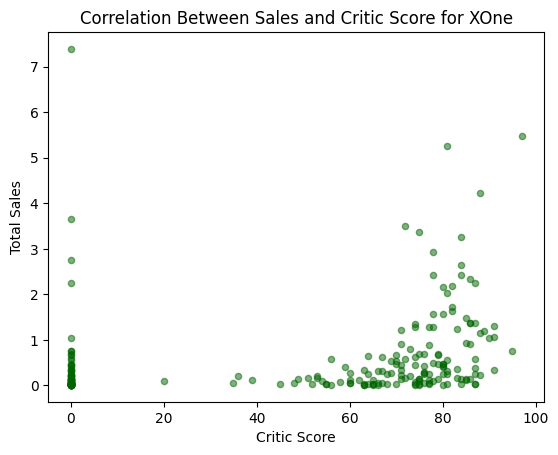

In [35]:
critic_corr_xbox = shared_releases[["total_sales_x","critic_score_x"]]
critic_corr_xbox.plot(kind="scatter", x="critic_score_x", y="total_sales_x", 
                      alpha=0.5, xlabel="Critic Score", ylabel="Total Sales", 
                      color="darkgreen", title="Correlation Between Sales and Critic Score for XOne")

<AxesSubplot:title={'center':'Correlation Between Sales and User Score for XOne'}, xlabel='User Score', ylabel='Total Sales'>

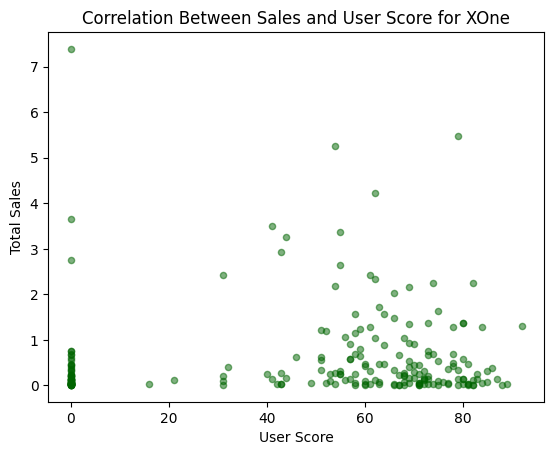

In [36]:
critic_corr_xbox = shared_releases[["total_sales_x","user_score_x", "critic_score_x"]]
critic_corr_xbox.plot(kind="scatter", x="user_score_x", y="total_sales_x", 
                      alpha=0.5, xlabel="User Score", ylabel="Total Sales", 
                      color="darkgreen", title="Correlation Between Sales and User Score for XOne")


In [37]:
critic_corr_xbox.corr()

,total_sales_x,user_score_x,critic_score_x
total_sales_x,1.000000,0.064075,0.225729
user_score_x,0.064075,1.000000,0.750261
critic_score_x,0.225729,0.750261,1.000000


In [38]:
shared_releases_pc = df_games[df_games["platform"] == "PC"]
shared_releases_ps4 = df_games[df_games["platform"] == "PS4"]
shared_releases_pc = shared_releases_ps4.merge(shared_releases_ps4, on="name", how="inner")

<AxesSubplot:title={'center':'Correlation Between Sales and Critic Score for PC'}, xlabel='Critic Score', ylabel='Total Sales'>

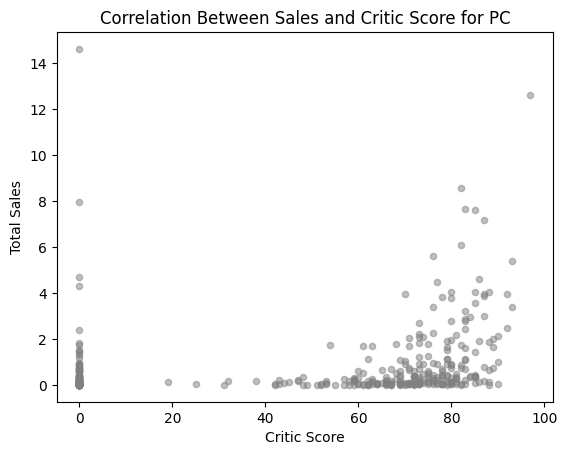

In [39]:
critic_corr_pc = shared_releases_pc[["total_sales_x","critic_score_x"]]
critic_corr_pc.plot(kind="scatter", x="critic_score_x", y="total_sales_x", 
                      alpha=0.5, xlabel="Critic Score", ylabel="Total Sales", 
                      color="gray", title="Correlation Between Sales and Critic Score for PC")

<AxesSubplot:title={'center':'Correlation Between Sales and Critic Score for PC'}, xlabel='User Score', ylabel='Total Sales'>

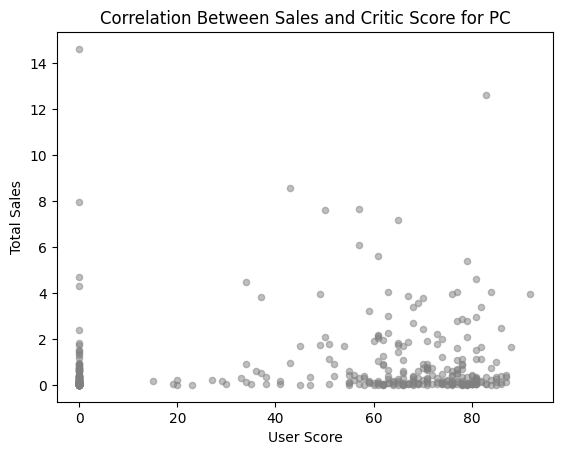

In [40]:
critic_corr_pc = shared_releases_pc[["total_sales_x","user_score_x","critic_score_x"]]
critic_corr_pc.plot(kind="scatter", x="user_score_x", y="total_sales_x", 
                      alpha=0.5, xlabel="User Score", ylabel="Total Sales", 
                      color="gray", title="Correlation Between Sales and Critic Score for PC")

In [41]:
critic_corr_pc.corr()

,total_sales_x,user_score_x,critic_score_x
total_sales_x,1.000000,0.113116,0.22755
user_score_x,0.113116,1.000000,0.90085
critic_score_x,0.227550,0.900850,1.00000


Al revisar la correlación entre la crítica de usuarios/críticos y las ventas de los video juegos, se concluye que hay una relación débil de influencia entre ambas variables. Esto puede deberse a que es una industria que se basa en preventas, en donde varios usuarios compran un título sin haber jugado antes o porque varios videojuegos son series ya populares con fans que la siguen desde hace años. Por lo que independientemente de la crítica, los usuarios quieren corroborar o seguir jugando los juegos de su serie favorita. 

Se nota una leve dispersión de mayores ventas con mejor calificación para la correlación entre la calificación de la crítica y las ventas, o sea, los críticos brindan mejores calificaciones en promedio. Esto puede deberse a que los críticos reciben copias gratuitas del juego por lo que no arriesgan su propio dinero en caso de que un juego sea considerado mediocre. Mientras la dispersión de datos de los usuarios presenta una mayor distribución. 

- Echa un vistazo a la **distribución general de los juegos por género.** ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

<AxesSubplot:title={'center':'Total Sales per Genre'}, ylabel='Total Sales'>

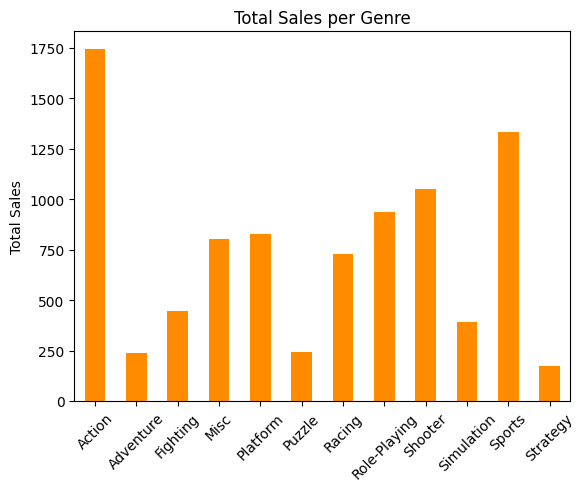

In [42]:
sales_per_genre = df_games.groupby("genre")["total_sales"].sum()
sales_per_genre.plot(kind="bar", rot=45, color="darkorange", xlabel="", ylabel="Total Sales", title="Total Sales per Genre")

El género de acción acapara significativamente al resto de géneros con casi 1750 millones de ventas acumuladas durante los años. Le sigue deportes con aproximadamente 1300 millones, Shooter con 1000 millones y Role Playing con 900 millones. Los más bajos son Puzzle con 250 millones y Strategy con 200 millones de ventas. Se puede conlcuir que la razón por la que el género Action al ser el más vendido es por su popularidad a un público joven y por su facilidad de comercialización, ya que es un género que ofrecen el mayor entretenimiento. Se podría asumir las menores ventas de los géneros Puzzle y Strategy debido a que los video juegos son percibidos como un tiempo de ocio después de completar otras actividades. Por lo que crear etrategias y resolver rompecabezas no es lo más popular para el tiempo libre. 

# Paso 4. Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:
- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

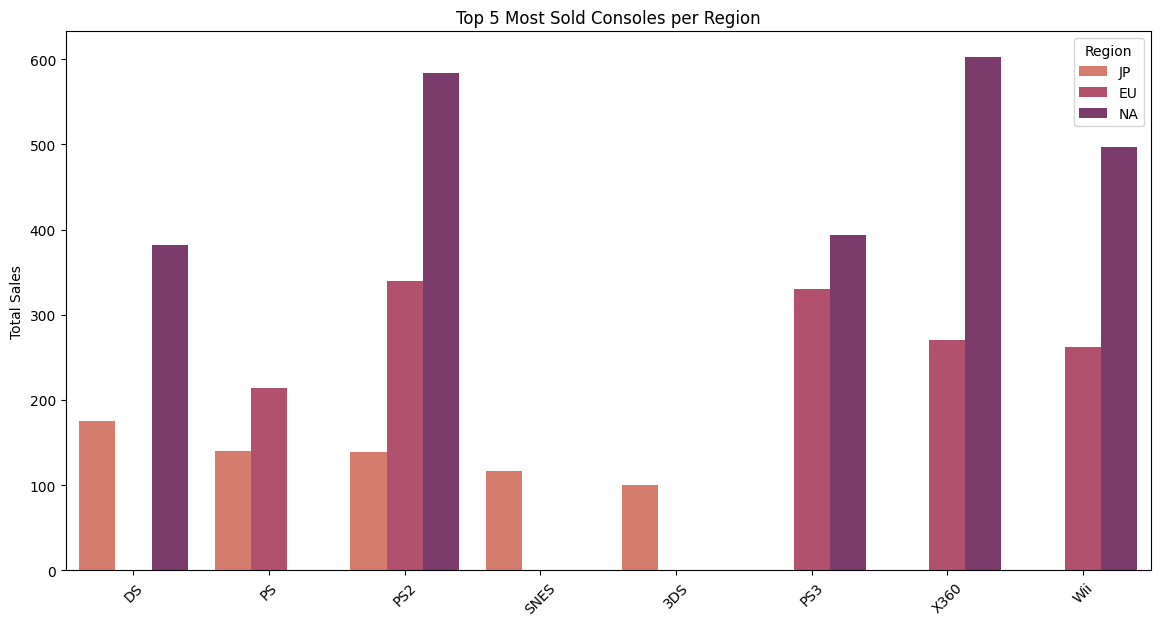

In [43]:
df_sales_jp = df_games.groupby(["platform"])["jp_sales"].sum().reset_index()
df_sales_eu = df_games.groupby(["platform"])["eu_sales"].sum().reset_index()
df_sales_na = df_games.groupby(["platform"])["na_sales"].sum().reset_index()

top_jp = df_sales_jp.nlargest(5, "jp_sales")
top_eu = df_sales_eu.nlargest(5, "eu_sales")
top_na = df_sales_na.nlargest(5, "na_sales")

top_jp["Region"] = "JP"
top_eu["Region"] = "EU"
top_na["Region"] = "NA"

df_top_platforms = pd.concat([top_jp[["platform", "jp_sales", "Region"]],
                              top_eu[["platform", "eu_sales", "Region"]],
                              top_na[["platform", "na_sales", "Region"]]])

df_top_platforms_melted = pd.melt(df_top_platforms, id_vars=["platform", "Region"], 
                                   value_vars=["jp_sales", "eu_sales", "na_sales"], 
                                   var_name="Sales_Region", value_name="Sales")

plt.figure(figsize=(14, 7))
sns.barplot(data=df_top_platforms_melted, x="platform", y="Sales", hue="Region", palette="flare")
plt.title("Top 5 Most Sold Consoles per Region")
plt.xlabel("")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.show()

El mercado de Norte América acapara gran parte de las ventas de las consolas, tales como: PS, PS2, PS3, X360 y Wii. Por lo que las tres empresas líderes en consolas son populares para la audiencia norteamericana. Para las consolas más vendidas en Japón se muestra una preferencia por empresas del mismo país, distribuyendo las ventas entre la DS, PS, PS2, SNES y 3DS. Esto nos demuestra que el público japonés tiene una mayor preferencia por las consolas portátiles. Para Europa comparte las mismas características que Norteamérica, pero con un volumen menor de ventas a comparación. 

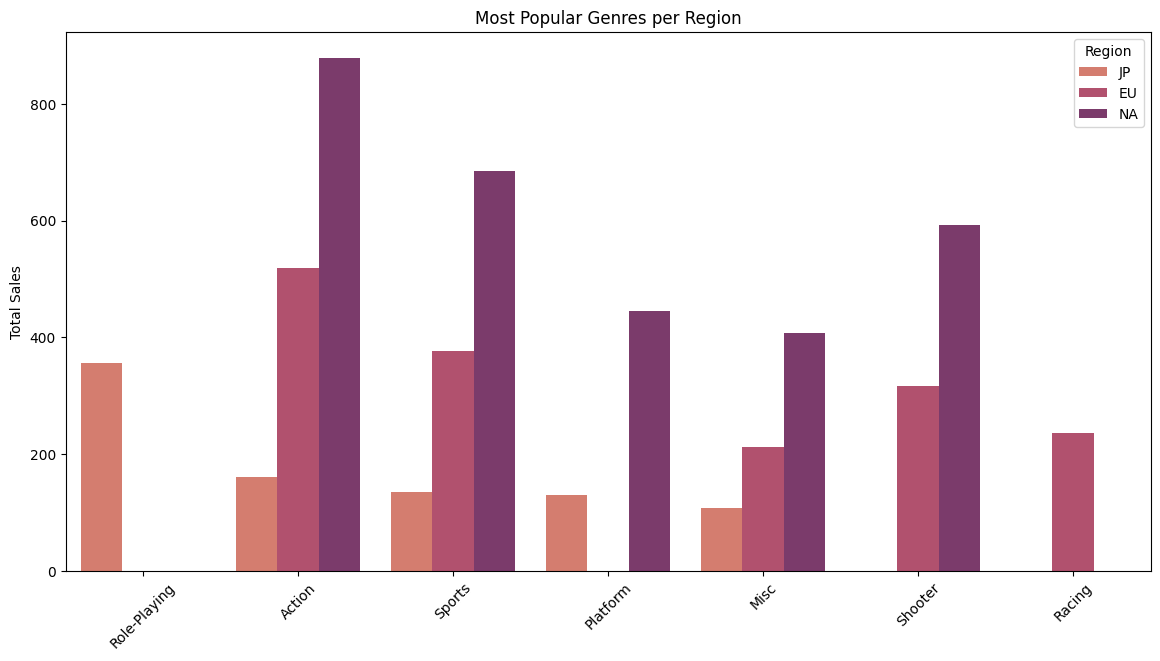

In [44]:
df_genre_jp = df_games.groupby(["genre"])["jp_sales"].sum().reset_index()
df_genre_eu = df_games.groupby(["genre"])["eu_sales"].sum().reset_index()
df_genre_na = df_games.groupby(["genre"])["na_sales"].sum().reset_index()

top_genre_jp = df_genre_jp.nlargest(5, "jp_sales")
top_genre_eu = df_genre_eu.nlargest(5, "eu_sales")
top_genre_na = df_genre_na.nlargest(5, "na_sales")


top_genre_jp["Region"] = "JP"
top_genre_eu["Region"] = "EU"
top_genre_na["Region"] = "NA"

df_top_genre = pd.concat([top_genre_jp[["genre", "jp_sales", "Region"]],
                              top_genre_eu[["genre", "eu_sales", "Region"]],
                              top_genre_na[["genre", "na_sales", "Region"]]])

df_top_genres_melted = pd.melt(df_top_genre, id_vars=["genre", "Region"], 
                                   value_vars=["jp_sales", "eu_sales", "na_sales"], 
                                   var_name="Genre_Region", value_name="Sales")

plt.figure(figsize=(14, 7))
sns.barplot(data=df_top_genres_melted, x="genre", y="Sales", hue="Region", palette="flare")
plt.title("Most Popular Genres per Region")
plt.xlabel("")
plt.ylabel("Total Sales")
plt.legend(title="Region")
plt.xticks(rotation=45)
plt.show()

Para los géneros más populares cada región tiene particularidades importantes. En Norteamérica presenta una alta preferencia por los videojuegos de Action, Sports, Platform y Shooter. Norteamérica acapara una gran cantidad de ventas para dichos géneros. Para Europa coincide en varios géneros,zz pero es la única región en donde los videojuegos tipo Racing. Japón igualmente es el único que tiene una gran diferencia por su preferencia por el género de Role-Playing.

<AxesSubplot:title={'center':'Total Sales per Rating'}, xlabel='Rating', ylabel='Total Sales'>

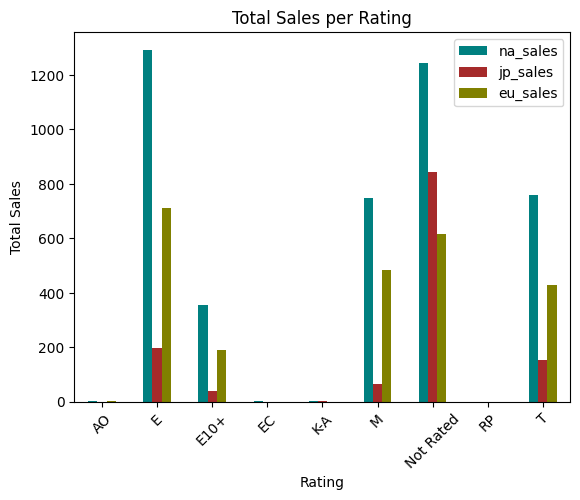

In [45]:
esrb_corr = df_games.groupby("rating")[["na_sales","jp_sales","eu_sales"]].sum()
esrb_corr.plot(kind="bar", color=["teal", "brown", "olive"], xlabel="Rating", ylabel="Total Sales", title="Total Sales per Rating", rot=45)

En este gráfico hay una distribución de datos interesante, ya no muestra una afectación directa en las ventas. Tanto los géneros Everyone, Mature y Teen tienen casi la misma distribución de ventas en cuanto a cada región. Norteamérica nuevamente lideras las ventas para todos los videojuegos dirigidos a varios públicos. 

# Paso 5. Prueba las siguientes hipótesis:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
Establece tu mismo el valor de umbral alfa.
Explica:
- Cómo formulaste las hipótesis nula y alternativa.
- Qué criterio utilizaste para probar las hipótesis y por qué.

H0 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

H1 = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

In [46]:
user_score_xbox = df_games[df_games["platform"] == "XOne"]
user_score_pc = df_games[df_games["platform"] == "PC"]

alpha = 0.05 

platform_score_comparative = st.ttest_ind(user_score_xbox["user_score"], user_score_pc["user_score"]) 

print("valor p: ", platform_score_comparative.pvalue) 

if platform_score_comparative.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.0005833414469972136
Rechazamos la hipótesis nula


H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [47]:
user_score_action = df_games[df_games["genre"] == "Action"]
user_score_sports = df_games[df_games["genre"] == "Sports"]

alpha = 0.05 

genre_score_comparative = st.ttest_ind(user_score_action["user_score"], user_score_sports["user_score"]) 

print("valor p: ", genre_score_comparative.pvalue) 

if genre_score_comparative.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  1.1356758476860697e-08
Rechazamos la hipótesis nula


Ambas hipótesis se rechazan sobre la diferencia del promedio tanto entre la crítica de usuarios de PC y Xbox One como para el promedio entre los géneros de Acción y Deportes. Se realiza una prueba de hipótesis de dos colas para revisar si la media de la muestra es considerablemente mayor o menor. Por lo que la diferencia entre sus promedios no se debe a la variabilidad de los datos, sino que sí son diferentes para la interpretación de cada hipótesis. 

# Paso 6. Escribe una conclusión general

La industria de los videojuegos es interesante de analizar ya que presenta varios cambios durante los años y porque tiene particularidades que la distintinguen de otros tipo de entretenimiento. Las consolas de los últimos años han concentrado gran parte de las ventas por lo que nos muestra cómo ha crecido de manera exponencial esta industria. Encontramos una variedad de consolas que se establecieron dentro del medio a través de sus videojuegos, tales como la PS2. No obstante, consolas nuevas como la X360 fue una nueva competencia para PlayStation, lo cual demuestra lo dinámica que puede ser la industria. Por otra parte, Nintendo demuestra que puede concentrar sus ventas en consolas de casa y las portátiles. 

Igualmente revisamos que los públicos de norteamerica y japonés difieren en los géneros y plataformas más importantes. Por lo que las estrategias de marketing y desarrollo de videojuegos deben de ser distintas y fijarse en los comportamientos de cada público para vender más videojuegos. 

Al revisar la correlación entre las ventas totales y la calificación de críticos y usuarios nos muestra que no tienen una dependencia significativa. Por lo que sería más importante enfocar las estrategias de venta en el contenido del videojuego y atraer a una audiencia específica. Finalmente la variabibilidad de los datos no afecta el promedio de la crítica de PC y Xbox, así como también el del género de acción y deportes. 